In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import warnings
#warnings.filterwarnings("ignore")

### Train Dataset

In [3]:
Train_data = pd.read_csv("/content/train_LZdllcl.csv")

In [4]:
Train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
Train_data.shape

(54808, 14)

In [7]:
Train_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [8]:
Train_data['education'].fillna(Train_data['education'].mode()[0],inplace = True)
Train_data['previous_year_rating'].fillna(Train_data['previous_year_rating'].median(),inplace=True)

<ipython-input-8-50c6aa14056e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Train_data['education'].fillna(Train_data['education'].mode()[0],inplace = True)
<ipython-input-8-50c6aa14056e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [9]:
Train_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [10]:
Train_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:

categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
encoder = LabelEncoder()
for col in categorical_cols:
    Train_data[col] = encoder.fit_transform(Train_data[col])

In [13]:
Train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [14]:
x = Train_data.drop(['employee_id','is_promoted'],axis=1)
y=Train_data['is_promoted']

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [16]:
scaled_data = scaler.transform(x)

In [17]:
type(scaled_data)

numpy.ndarray

In [18]:
scaled_data = pd.DataFrame(scaled_data)

In [19]:
type(scaled_data)

pandas.core.frame.DataFrame

In [20]:
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.875,0.939394,1.0,0.0,1.0,0.000000,0.375,1.00,0.194444,1.0,0.0,0.166667
1,0.500,0.424242,0.0,1.0,0.0,0.000000,0.250,1.00,0.083333,0.0,0.0,0.350000
2,0.875,0.303030,0.0,1.0,1.0,0.000000,0.350,0.50,0.166667,0.0,0.0,0.183333
3,0.875,0.454545,0.0,1.0,0.0,0.111111,0.475,0.00,0.250000,0.0,0.0,0.183333
4,1.000,0.545455,0.0,1.0,0.0,0.000000,0.625,0.50,0.027778,0.0,0.0,0.566667
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.000,0.151515,0.0,1.0,1.0,0.000000,0.700,0.50,0.444444,0.0,0.0,0.650000
54804,0.500,0.575758,1.0,0.0,0.0,0.000000,0.425,0.25,0.138889,0.0,0.0,0.283333
54805,0.000,0.000000,0.0,1.0,0.0,0.000000,0.175,1.00,0.055556,1.0,0.0,0.666667
54806,0.875,1.000000,0.0,1.0,1.0,0.000000,0.225,0.00,0.027778,0.0,0.0,0.100000


In [21]:
scaled_data.columns

RangeIndex(start=0, stop=12, step=1)

In [22]:
scaled_data.columns=['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score']

In [23]:
scaled_data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.875,0.939394,1.0,0.0,1.0,0.000000,0.375,1.00,0.194444,1.0,0.0,0.166667
1,0.500,0.424242,0.0,1.0,0.0,0.000000,0.250,1.00,0.083333,0.0,0.0,0.350000
2,0.875,0.303030,0.0,1.0,1.0,0.000000,0.350,0.50,0.166667,0.0,0.0,0.183333
3,0.875,0.454545,0.0,1.0,0.0,0.111111,0.475,0.00,0.250000,0.0,0.0,0.183333
4,1.000,0.545455,0.0,1.0,0.0,0.000000,0.625,0.50,0.027778,0.0,0.0,0.566667
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.000,0.151515,0.0,1.0,1.0,0.000000,0.700,0.50,0.444444,0.0,0.0,0.650000
54804,0.500,0.575758,1.0,0.0,0.0,0.000000,0.425,0.25,0.138889,0.0,0.0,0.283333
54805,0.000,0.000000,0.0,1.0,0.0,0.000000,0.175,1.00,0.055556,1.0,0.0,0.666667
54806,0.875,1.000000,0.0,1.0,1.0,0.000000,0.225,0.00,0.027778,0.0,0.0,0.100000


In [24]:
x1 = Train_data.drop('is_promoted',axis=1)
y1 = Train_data['is_promoted']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [29]:
print('Accuracy is : ',accuracy_score(y_test,y_pred_rf))
print('Precision is : ',precision_score(y_test,y_pred_rf,average = 'micro'))
print('Recall is : ',recall_score(y_test,y_pred_rf,average='micro'))
print('F1 Score is : ',f1_score(y_test,y_pred_rf,average = 'micro'))
print('confusion matrix is : ',confusion_matrix(y_test,y_pred_rf))

Accuracy is :  0.9353220215289181
Precision is :  0.9353220215289181
Recall is :  0.9353220215289181
F1 Score is :  0.9353220215289181
confusion matrix is :  [[9990   64]
 [ 645  263]]


### Test Dataset

In [30]:
Test_data = pd.read_csv("/content/test_2umaH9m.csv")

In [31]:
Test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [32]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [33]:
Test_data.shape

(23490, 13)

In [34]:
Test_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [35]:
Test_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [36]:
Test_data['education'].fillna(Test_data['education'].mode()[0],inplace = True)
Test_data['previous_year_rating'].fillna(Test_data['previous_year_rating'].median(),inplace=True)

<ipython-input-36-6da5fce4fe26>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Test_data['education'].fillna(Test_data['education'].mode()[0],inplace = True)
<ipython-input-36-6da5fce4fe26>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [37]:
Test_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [38]:
categ_feature= [feature for feature in Test_data.columns if Test_data[feature].dtype=='O']

In [39]:
categ_feature

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [40]:
for feature in categ_feature:
    le = LabelEncoder()
    Test_data[feature]=le.fit_transform(Test_data[feature])

In [41]:
Test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,3.0,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61


In [42]:
from sklearn.cluster import KMeans

In [43]:
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans = kmeans.fit(Test_data)
    wcss.append(kmeans.inertia_)

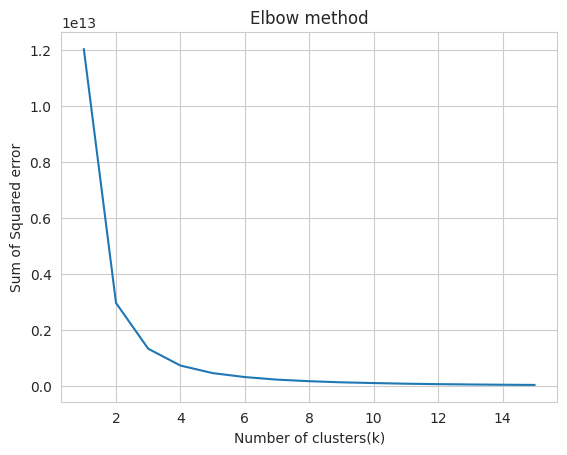

In [44]:
sns.set_style("whitegrid")
g = sns.lineplot(x=range(1,16), y=wcss)

g.set(xlabel = "Number of clusters(k)",
      ylabel = "Sum of Squared error",
     title = "Elbow method")
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(Test_data)

In [46]:
y_kmeans

array([1, 0, 0, ..., 2, 1, 1], dtype=int32)

In [47]:
from sklearn.metrics import silhouette_score
sil_kmeans = silhouette_score(Test_data,y_kmeans)

In [48]:
sil_kmeans

0.5871693552078963

In [49]:
import scipy.cluster.hierarchy as sch

In [53]:
from sklearn.cluster import AgglomerativeClustering

In [54]:
ahc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(Test_data)

In [55]:
y_ahc

array([3, 2, 2, ..., 1, 3, 3])

In [56]:
from sklearn.metrics import silhouette_score
sil_ahc = silhouette_score(Test_data, y_ahc)

In [57]:
sil_ahc

0.5317516196167962

In [58]:
sample_submission=pd.read_csv("/content/sample_submission_M0L0uXE.csv")
sample_submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [59]:
sample_submission['is_promoted']=sil_kmeans

In [60]:
sample_submission.to_csv('final_submission.csv',index=False)

In [61]:
final=pd.read_csv("/content/final_submission.csv")

In [62]:
final

,employee_id,is_promoted
0,8724,0.587169
1,74430,0.587169
2,72255,0.587169
3,38562,0.587169
4,64486,0.587169
...,...,...
23485,53478,0.587169
23486,25600,0.587169
23487,45409,0.587169
23488,1186,0.587169
